# Scenario D - Peakshape Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows:

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot f_{pseudo-Voigt}(x)\big] + \epsilon
\end{equation}

where:

\begin{equation}
\large f_{pseudo-Voigt}(x) = \eta \cdot \frac{\sigma_m^2}{(x-\mu_m)^2 + \sigma_m^2} + (1 - \eta) \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Import local modules

In [2]:
import sys
sys.path.append('../../modules')
import results as res
import figures as fig

## Load results and extract convergence information

In [3]:
# list of result files to load
filelst = ['./scenario_peakshape_mruns.csv']

ldf = res.load_results(filelst)

reading file: ./scenario_peakshape_mruns.csv


In [4]:
# extract the convergence results per model
labellist = [0.0, 0.25, 0.5, 0.75, 1.0]
dres = res.get_model_summary(ldf, labellist)

In [5]:
# figure size and color mapping
figs=(8,8)

col = "Blues"
col_r = col + "_r"

## Heatmaps of n-peak model vs. n-peak number in dataset

### WAIC

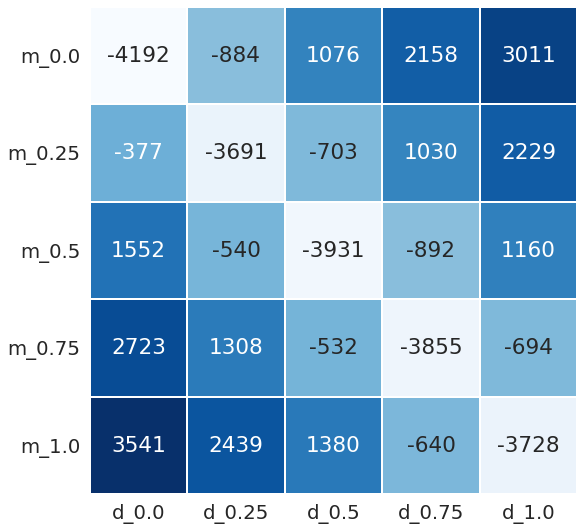

In [6]:
fig.plot_heatmap(dres['waic'], labellist, title="", color=col, fsize=figs, fname="hmap_waic", precision=".0f")

### Rhat

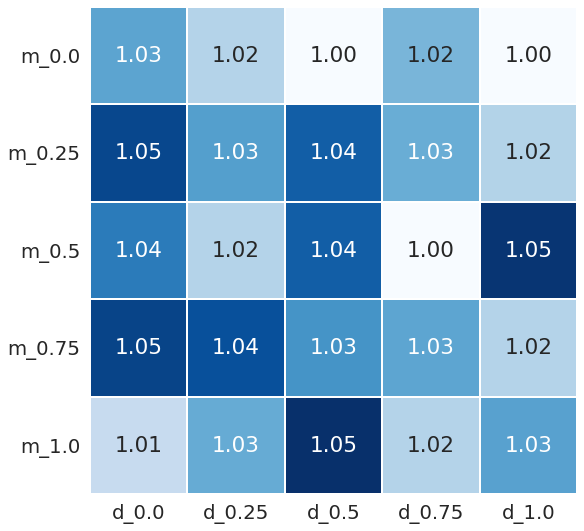

In [7]:
fig.plot_heatmap(dres['rhat'], labellist, title="", color=col, fsize=figs, fname="hmap_rhat", precision=".2f")

### R2

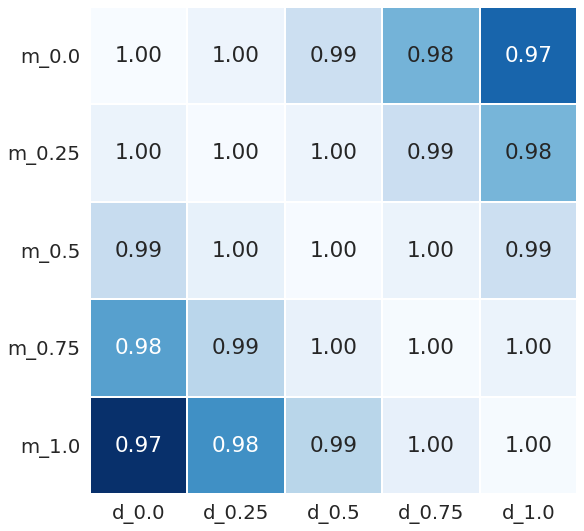

In [8]:
fig.plot_heatmap(dres['r2'], labellist, title="", color=col_r, fsize=figs, fname="hmap_r2", precision=".2f")

### BFMI

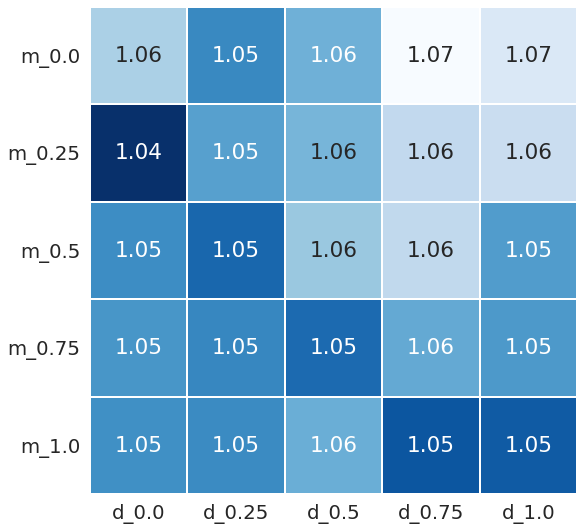

In [9]:
fig.plot_heatmap(dres['bfmi'], labellist, title="", color=col_r, fsize=figs, 
                     fname="hmap_bfmi", precision=".2f")

### MCSE

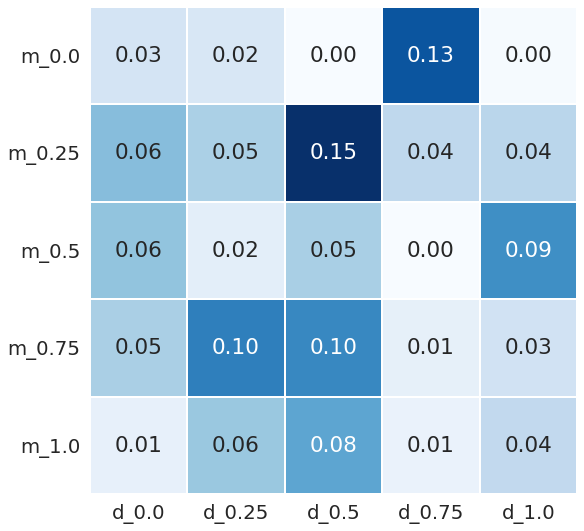

In [10]:
fig.plot_heatmap(dres['mcse'], labellist, title="", color=col, fsize=figs, fname="hmap_mcse", precision=".2f")

### Noise

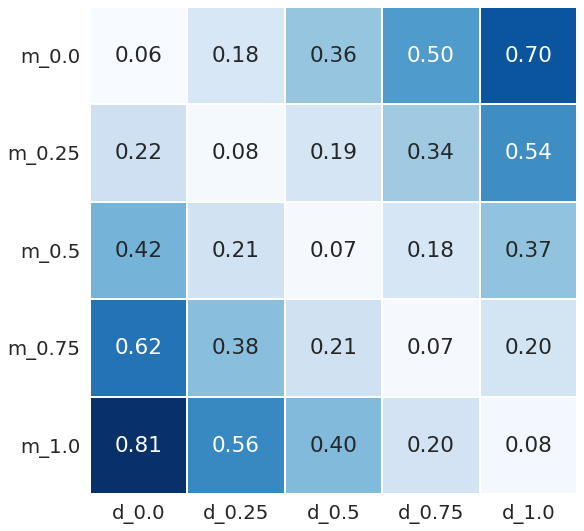

In [11]:
fig.plot_heatmap(dres['noise'], labellist, title="", color=col, fsize=figs, 
                     fname="hmap_noise", precision=".2f")

### ESS

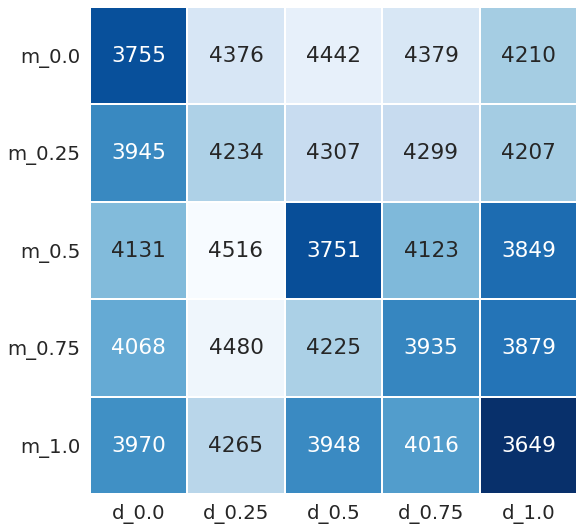

In [12]:
fig.plot_heatmap(dres['ess'], labellist, title="", color=col_r, fsize=figs, fname="hmap_ess", precision=".0f")